### sentimatnet analysis

In [33]:
import pandas as pd
import networkx as nx
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
# getting books
books = pd.read_csv('final_books.csv')

# Identify duplicates by book title
duplicates = books['title'].duplicated(keep='first')

# Drop duplicate books based on their index
books.drop(index=books[duplicates].index, inplace=True)

#Dropping null values
books = books = books.dropna(subset=['description']).reset_index(drop=True)
#books

In [4]:
# I didnt want to keep downloading this if it was already available locally. 
def check_nltk_resources():
    # Check if stopwords are downloaded
    if not nltk.corpus.stopwords.words('english'):
        nltk.download('stopwords')

    # Check if punkt is downloaded
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')

    # Check if wordnet is downloaded
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')

check_nltk_resources()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Cleaning texts

In [5]:
# prepares text to have a fair comparisons
def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Lemmatize the words ~ normalization of words basically
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the words back into a string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [6]:
# Filter out non-string descriptions
descriptions = books['description'].astype(str)

In [7]:
# Preprocess the descriptions using the preprocess_text function
preprocessed_descriptions = descriptions.apply(preprocess_text)
print(preprocessed_descriptions.head(10))


0    drawing mass new rediscovered material , autho...
1    logo -- everything food fashion conference cor...
2    newbery medal winner '' supersharp mystery ......
3    million fan know watching food network , tyler...
4    traveling globe host food network 's hit tv sh...
5    charge want make difference : dilemma . may kn...
6    `` e una composicion en busca de la frase just...
7    ever-popular kitchen confidential available sp...
8    ovid ’ sensuous witty poem , accessible transl...
9    play bacchae , euripides chooses central figur...
Name: description, dtype: object


In [8]:
from textblob import TextBlob

# Create a function to get the sentiment polarity of a given text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis function to the preprocessed descriptions
sentiments = preprocessed_descriptions.apply(get_sentiment)


In [9]:
sentiments

0       0.256566
1       0.248636
2       0.171212
3       0.306771
4       0.084809
          ...   
3020   -0.027273
3021    0.000000
3022    0.000000
3023    0.000000
3024    0.074459
Name: description, Length: 3025, dtype: float64

In [10]:
books['sentiment'] = sentiments
books.head(11)

,id,title,isbn,page_count,publishing_date,form,publisher,language,author,illustrator,...,subject,awards,nominations,characters,description,sub_title,book_id,average_rating,ratings_count,sentiment
0,ilINAQAAMAAJ,Kahlil Gibran,"9781566562492, 156656249X",456,1998,Paperback,Interlink Books,English,"Jean Gibran, Kahlil Gibran",NaN,...,"Authors, Arab -- Biography -- Lebanon -- Unite...",NaN,NaN,NaN,Drawing on masses of new and rediscovered mate...,His Life and World,ilINAQAAMAAJ,NaN,NaN,0.256566
1,cOpWAQAACAAJ,LogoLounge,NaN,191,September 2004,Paperback,Rockport Publishers,English,"Bill Gardner, Catharine Fishel",NaN,...,"Design / General, Design / Graphic Arts / Comm...",NaN,NaN,NaN,Logos -- for everything from food and fashion ...,"2,000 International Identities by Leading Desi...",cOpWAQAACAAJ,NaN,NaN,0.248636
2,JJWMEAAAQBAJ,The Westing Game,"9780142401200, 014240120X",192,2004,Paperback,Penguin Young Readers Group,English,Ellen Raskin,NaN,...,Juvenile Fiction / Family / Marriage & Divorce...,John Newbery Medal,"John Newbery Medal, National Book Award for Ch...","Samuel W. Westing, Berthe Erica Crow, Catherin...","A Newbery Medal Winner\r\n\r\n""A supersharp my...",NaN,JJWMEAAAQBAJ,4.0,1.0,0.171212
3,cGxOHgpsgX8C,Tyler's Ultimate,"9781400052387, 1400052386",254,2006,Hardcover,Clarkson Potter/Publishers,English,Tyler Florence,NaN,...,"Cooking, Cooking / Courses & Dishes / General,...",NaN,NaN,NaN,As his millions of fans know from watching him...,Brilliant Simple Food to Make Any Time,cGxOHgpsgX8C,NaN,NaN,0.306771
4,nF2PcyCJb0UC,Eat this Book,"9781400052370, 1400052378",287,2005,Hardcover,Clarkson Potter/Publishers,English,Tyler Florence,NaN,...,"Cookery, Cooking, Cooking / Methods / General,...",NaN,NaN,NaN,While traveling the globe as the host of Food ...,Cooking with Global Fresh Flavors,nF2PcyCJb0UC,NaN,NaN,0.084809
5,4rCumAEACAAJ,Getting Things Done When You Are Not in Charge,"9781576751725, 1576751724",156,"August 27, 2001",Paperback,Berrett-Koehler Publishers,English,Geoffrey M. Bellman,NaN,...,"Business & Economics / Leadership, Business & ...",NaN,NaN,NaN,You are not in charge and you want to make a d...,NaN,4rCumAEACAAJ,NaN,NaN,0.118485
6,5VZzSgAACAAJ,Formas breves,NaN,142,2000,Hardcover,Anagrama,Spanish,Ricardo Piglia,NaN,...,"Argentine literature -- History and criticism,...",NaN,NaN,NaN,"""Es una composicion en busca de la frase justa...",NaN,5VZzSgAACAAJ,NaN,NaN,0.000000
7,XE0MAAAACAAJ,Confesiones de un chef,"9788466308953, 8466308954",478,2002,Paperback,Suma de Letras,Spanish,Anthony Bourdain,NaN,...,Cooks -- Biography -- New York (State) -- New ...,NaN,NaN,NaN,The ever-popular Kitchen Confidential is now a...,NaN,XE0MAAAACAAJ,NaN,NaN,0.266667
8,iYOMEAAAQBAJ,Metamorphoses,"9780140447897, 014044789X",723,"January 29, 2004",Paperback,Penguin Publishing Group,English,Ovid,NaN,...,"Fiction / Classics, Literary Criticism / Poetr...",NaN,NaN,NaN,"Ovid’s sensuous and witty poem, in an accessib...",NaN,iYOMEAAAQBAJ,NaN,NaN,0.355114
9,B_YEEAAAQBAJ,Dionysiac Poetics and Euripides' Bacchae,"9780691015972, 069101597X",420,"November 16, 1997",Paperback,Princeton University Press,English,Charles Segal,NaN,...,"Literary Criticism / Ancient & Classical, Bacc...",NaN,NaN,NaN,"In his play Bacchae, Euripides chooses as his ...",Expanded Edition,B_YEEAAAQBAJ,NaN,NaN,0.116667


In [42]:
# Get the 10 books with the most negative sentiments
top_negative = books.loc[sentiments.nsmallest(10).index][['title', 'author', 'description', 'genres', 'sentiment']]
print("Top 10 books with the most negative sentiments:")
top_negative

Top 10 books with the most negative sentiments:


,title,author,description,genres,sentiment
192,Harry Potter y La Orden del Fenix,J. K. Rowling,Las tediosas vacaciones de verano en la casa d...,"Novel, Young adult fiction, Fantasy Fiction",-1.000000
1243,Redwall (Tale of Redwall),Brian Jacques,"Redwall Abbey, tranquil home to a community of...",NaN,-1.000000
1487,Carrie (Los Jet De Plaza & Janes. Biblioteca D...,Stephen King,El escalofriante caso de una joven en aparienc...,"Horror fiction, Horror, Epistolary novel",-1.000000
1608,Last Man Standing,David Baldacci,An FBI agent in the Hostage and Rescue Team be...,"Thriller, Fiction, Suspense, Crime fiction, My...",-0.875000
3014,Materia oscura,Philip Pullman,"Aunque la trilogía Materia oscura, originalmen...",NaN,-0.875000
650,El perfume,Patrick Süskind,Jean Baotiste Grenouille nació con muy poca su...,"Novel, Mystery, Horror fiction, Magical Realis...",-0.850000
306,Trainspotting,Irvine Welsh,"Sick Boy, Spud, Mark et Matty partagent tout :...","Novel, Fiction, Dark comedy, Travel literature",-0.714286
75,Mr. Impossible,Roger Hargreaves,Mr. Impossible can jump over a house and solve...,NaN,-0.666667
1938,The Omega Cage,"Steve Perry, Michael Reaves",Omega Cage is a hi-tech prison on an isolated ...,"Science fiction, Space opera",-0.627083
2568,The Time of the Ghost,Diana Wynne Jones,There's been an accident!\r\nSomething's wrong...,"Fantasy, Fantasy Fiction, Children's literatur...",-0.608333


In [12]:
# Get the 10 books with the most positive sentiments
top_positive = books.loc[sentiments.nlargest(10).index][['title', 'author', 'description', 'genres', 'sentiment']]
print("\nTop 10 books with the most positive sentiments:")
top_positive


Top 10 books with the most positive sentiments:


,title,author,description,genres,sentiment
2475,Sylvester,Georgette Heyer,"""Sylvester"" is one of the best of Georgette He...","Romance novel, Regency romance, Historical Fic...",0.812500
592,The Heidi Chronicles,Wendy Wasserstein,THE STORY: Comprised of a series of interrelat...,NaN,0.750000
2879,A Whole Lotta Love,"Donna Hill, Brenda Jackson, Francis Ray, Monic...",Four curvaceous bombshells find love and roman...,"Fiction, Romance novel",0.750000
2780,Chocolate and the Art of Low-fat Desserts,Alice Medrich,For the connoisseurs who prized Cocolat--Medri...,NaN,0.718750
2872,Love Poems & Sonnets of William Shakespeare,William Shakespeare,"The greatest sonnets ever written, by the grea...","Poetry, Drama",0.666667
1876,My Perfect Life Reissue,Dyan Sheldon,Captures teen angst with wit and poignancy. . ...,"Young adult fiction, Humor, Comedy, Chick lit",0.660714
2738,1599,James S. Shapiro,How did Shakespeare go from being a talented w...,NaN,0.651389
640,Henry Miller on Writing,Henry Miller,Some of the most rewarding pages in Henry Mill...,NaN,0.650000
1836,One More for the Road,Ray Bradbury,Ray Bradbury provides readers with tales of ab...,"Short story, Science fiction, Fantasy, Fantasy...",0.650000
2128,Dazzling Brightness,Roberta Gellis,"An enchanting, unforgettable tale of passion, ...","Romance novel, Fantasy Fiction, Romantic fantasy",0.650000


### considering doing an analysis between sentiment and other metrics?

# Jaccard Similarity

In [13]:
# Getting fresh books
books02 = pd.read_csv('final_books.csv')
print(books.shape)

books02 = books.dropna(subset=['genres']).reset_index(drop=True)

# Filter out non-string descriptions
genres = books02['genres'].astype(str)
print(genres.shape)


(3025, 22)
(1696,)


In [14]:
# Preprocess the genres column using the preprocess_text function
preprocessed_genres = genres.apply(preprocess_text)
preprocessed_genres

0       novel , mystery , humor , young adult fiction ...
1                               biography , autobiography
2                                    poetry , epic poetry
3                                  picture book , fiction
4             epic , adventure fiction , nautical fiction
                              ...                        
1691                       biography , personal narrative
1692                novel , fiction , child 's literature
1693                          allegory , domestic fiction
1694                             novel , humorous fiction
1695    novel , fantasy , fantasy fiction , child 's l...
Name: genres, Length: 1696, dtype: object

In [15]:
def jaccard_similarity(s1, s2):
    set1 = set(s1)
    set2 = set(s2)
    if len(set1 | set2) == 0:
        return 0
    return len(set1 & set2) / len(set1 | set2)


In [18]:
similarities = []
for i, row in preprocessed_genres.to_frame().iterrows():
    genres1 = row['genres']
    similarity_scores = []
    for j, row2 in preprocessed_genres.to_frame().iterrows():
        genres2 = row2['genres']
        similarity = jaccard_similarity(genres1, genres2)
        similarity_scores.append(similarity)
    similarities.append(similarity_scores)


In [19]:
len(similarities)

1696

In [20]:
# Select a book
selected_book = books02.iloc[248]['title']

# Gets the index of the selected book
book_index = books02.loc[books02['title'] == selected_book].index[0]

# Calculates the similarity scores between the selected book and all other books
similarity_scores = similarities[book_index]

# Creates a DataFrame to store the similar books and their information
similar_books_df = pd.DataFrame(columns=['ID', 'Title', 'Sub Title', 'Similarity', 'Genres'])

# Iterates over the books and their similarity scores
for i, score in enumerate(similarity_scores):
    if i != book_index:
        book_id = books02.loc[i]['id']
        book_title = books02.loc[i]['title']
        book_subtitle = books02.loc[i]['sub_title']
        book_genre = books02.loc[i]['genres']
        similar_books_df = pd.concat([similar_books_df, pd.DataFrame([[book_id, book_title, book_subtitle, score, book_genre]], columns=['ID', 'Title', 'Sub Title', 'Similarity', 'Genres'])], ignore_index=True)

# Adds the selected book to the DataFrame
selected_book_tuple = (books02.loc[book_index]['id'], selected_book, books02.loc[book_index]['sub_title'], 1.0, books02.loc[book_index]['genres'])
similar_books_df = pd.concat([similar_books_df, pd.DataFrame([selected_book_tuple], columns=['ID', 'Title', 'Sub Title', 'Similarity', 'Genres'])], ignore_index=True)

# Sorts the DataFrame by similarity scores in descending order
similar_books_df = similar_books_df.sort_values(by='Similarity', ascending=False).reset_index(drop=True)

# Prints out the table of similar books
print(f"Books similar to '{selected_book}':")
similar_books_df.head(11)


Books similar to 'The Flying Sorcerers':


,ID,Title,Sub Title,Similarity,Genres
0,kNZHPwAACAAJ,The Flying Sorcerers,More Comic Tales of Fantasy,1.000000,"Humor, Science fiction, Fantasy Fiction"
1,p899yqJFhvQC,Swell Foop (Xanth),NaN,1.000000,"Fantasy, Science fiction, Fantasy Fiction, Humor"
2,V3gaAQAAMAAJ,Xanth,The Quest for Magic,1.000000,"Humor, Science fiction, Fantasy Fiction"
3,h7pjdEPBeGUC,The Long Dark Tea-Time of the Soul,NaN,0.941176,"Science fiction, Comedy, Mystery, Fantasy Fict..."
4,SJ0RAAAACAAJ,Buenos presagios,las buenas y ajustadas profecías de Agnes la C...,0.941176,"Fantasy, Humor, Comedy, Fantasy Fiction, Horro..."
5,j_dvDwAAQBAJ,Complete Plays of Aristophanes,NaN,0.941176,"Drama, Comedy, Humorous Fiction"
6,IwdwDwAAQBAJ,Dominion,NaN,0.941176,"Mystery, Suspense, Christian Fiction"
7,VsEtBq0glyQC,Smoke and Mirrors,Short Fictions and Illusions,0.941176,"Short story, Science fiction, Poetry, Horror f..."
8,hdF6HTBvK30C,Deck the Halls (Holiday Classics),NaN,0.937500,"Mystery, Fiction, Christmas Story"
9,irEKXAf229sC,Up In a Heaval (Xanth),NaN,0.937500,"Fantasy, Fantasy Fiction, Humor, Humorous Fiction"


# Generating Word Cloud for genres

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

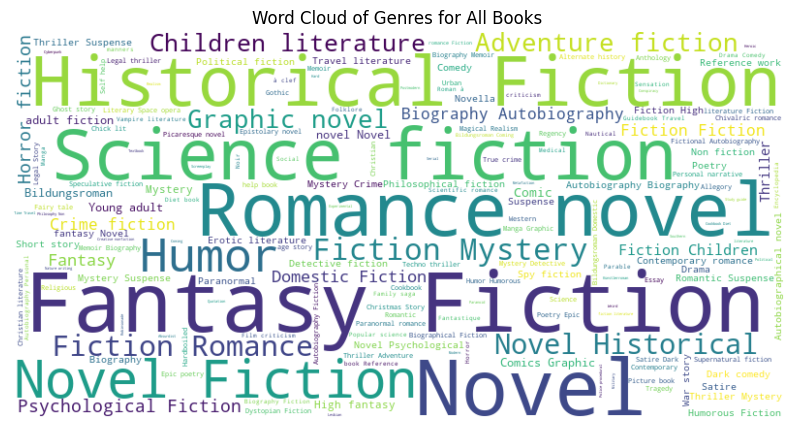

Recommended books based on top genres:
                                                  title   
0                                      The Westing Game  \
1                                Confesiones de un chef   
2                                         Metamorphoses   
3                                      Wild About Books   
4                        Moby Dick, Or, The White Whale   
...                                                 ...   
1691                                          Co. Aytch   
1692                 Fantastic Mr. Fox (Cover to Cover)   
1693  Bella Y Oscura / Beautiful And Dark (Novela (B...   
1694                      La tía Julia y el escribidor   
1695                             O cavalo e o seu rapaz   

                                                 genres  
0     Novel, Mystery, Humor, Young adult fiction, Ch...  
1                              Biography, Autobiography  
2                                   Poetry, Epic poetry  
3                   

In [53]:
# Concatenates the genres of all books into a single string
all_genres_text = ' '.join(books02['genres'])

# Creates a word cloud based on all genres
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Genres for All Books")
plt.show()

# Extracts the most frequent genres from the word cloud
top_genres = wordcloud.words_

# Uses the top genres to filter and recommend books
recommendations = books02[books02['genres'].apply(lambda genres: any(genre in genres for genre in top_genres))]

# Print the recommended books
print("Recommended books based on top genres:")
print(recommendations[['title', 'genres']])